In [13]:
############################ Data Analysis & Calculation ############################
import numpy as np 
import pandas as pd 
############################ Ignore Warning  ############################
import warnings
warnings.filterwarnings("ignore")
############################ Data visualization ############################
import seaborn as sns
import matplotlib.pyplot as plt

Data Importing

In [14]:
import pandas as pd
data =pd.read_csv (r"C:\Users\Lenovo\Desktop\capstone_project\cp2_allocation_files\cp2_project_files\transaction.csv")
data.head()

,TransactionID,UserID,Transactionamount,Transactiondate/time,Transactiontype,Merchantcategory,Location,Accountbalance,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions,Fraudlabel
0,1,12345,250,25-11-2024 09:45,Withdrawal,ATM,New York,5000,Phone,192.168.1.1,Success,Morning,5,0
1,2,12346,1200,25-11-2024 13:30,Purchase,Online Store,California,3000,Laptop,192.168.1.2,Success,Afternoon,3,0
2,3,12347,5000,25-11-2024 21:15,Withdrawal,ATM,New York,10000,Phone,192.168.1.3,Failed,Evening,10,1
3,4,12348,50,26-11-2024 04:20,Purchase,Restaurant,Chicago,200,Tablet,192.168.1.4,Success,Early Morning,1,0
4,5,12349,15000,26-11-2024 18:05,Withdrawal,ATM,Texas,20000,Phone,192.168.1.5,Flagged,Evening,15,1


Data Pre-processing

In [15]:
data = data.drop('UserID',axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TransactionID            20 non-null     int64 
 1   Transactionamount        20 non-null     int64 
 2   Transactiondate/time     20 non-null     object
 3   Transactiontype          20 non-null     object
 4   Merchantcategory         20 non-null     object
 5   Location                 20 non-null     object
 6   Accountbalance           20 non-null     int64 
 7   Deviceinformation        20 non-null     object
 8   IPaddress                20 non-null     object
 9   Transactionstatus        20 non-null     object
 10  Timeofday                20 non-null     object
 11  Frequencyoftransactions  20 non-null     int64 
 12  Fraudlabel               20 non-null     int64 
dtypes: int64(5), object(8)
memory usage: 2.2+ KB


In [17]:
data.Frequencyoftransactions.value_counts()

Frequencyoftransactions
5      1
3      1
211    1
197    1
183    1
169    1
155    1
141    1
127    1
113    1
99     1
85     1
71     1
57     1
43     1
29     1
15     1
1      1
10     1
225    1
Name: count, dtype: int64

In [18]:
data['Frequencyoftransactions'] = data["Frequencyoftransactions"].replace(" ",np.nan).astype(float)

In [19]:
data.Frequencyoftransactions.value_counts(dropna=False)

Frequencyoftransactions
5.0      1
3.0      1
211.0    1
197.0    1
183.0    1
169.0    1
155.0    1
141.0    1
127.0    1
113.0    1
99.0     1
85.0     1
71.0     1
57.0     1
43.0     1
29.0     1
15.0     1
1.0      1
10.0     1
225.0    1
Name: count, dtype: int64

Missing value Identify and Treatment

In [20]:
data.isnull().sum()

TransactionID              0
Transactionamount          0
Transactiondate/time       0
Transactiontype            0
Merchantcategory           0
Location                   0
Accountbalance             0
Deviceinformation          0
IPaddress                  0
Transactionstatus          0
Timeofday                  0
Frequencyoftransactions    0
Fraudlabel                 0
dtype: int64

Outlier Identify and Treatment

<Axes: ylabel='Frequencyoftransactions'>

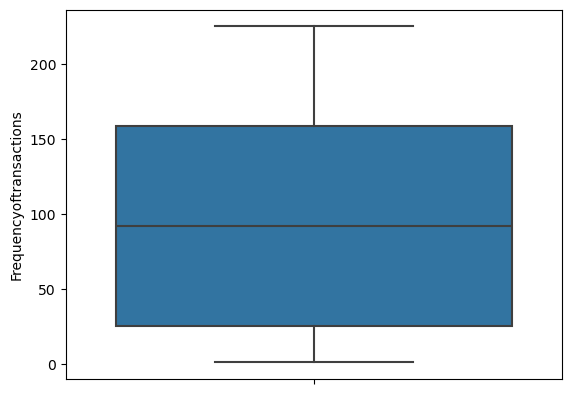

In [21]:
sns.boxplot(y=data.Frequencyoftransactions)

<Axes: ylabel='Transactionamount'>

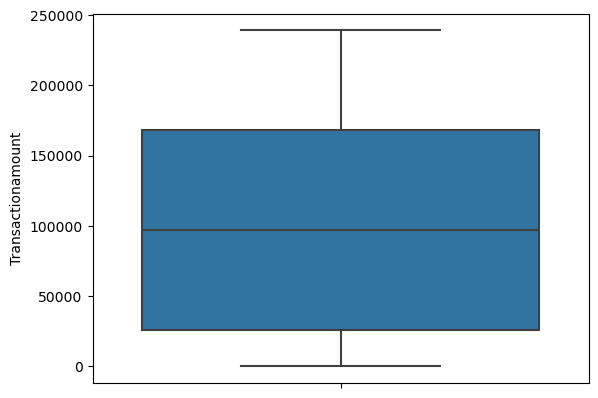

In [25]:
sns.boxplot(y=data.Transactionamount)

<Axes: ylabel='Accountbalance'>

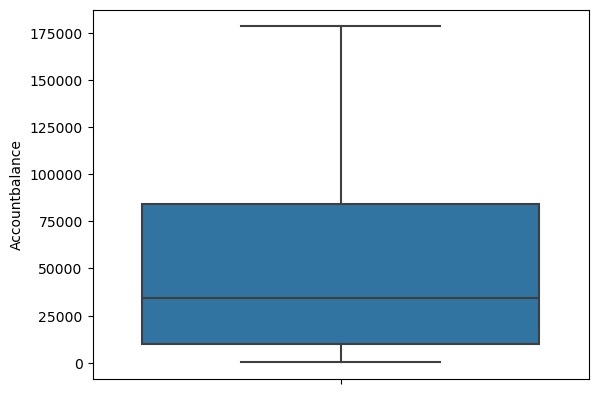

In [24]:
sns.boxplot(y=data.Accountbalance)

Data Manipulation

In [26]:
data.Accountbalance = data.Accountbalance.replace({1:"Yes",0:"No"})

In [28]:
data.Fraudlabel.value_counts()

Fraudlabel
0    11
1     9
Name: count, dtype: int64

In [31]:
def Frequencyoftransactions_lab(data) :
    if data["Frequencyoftransactions"] <= 12 :
        return "Frequencyoftransactions_0-12"
    elif (data["Frequencyoftransactions"] > 12) & (data["Frequencyoftransactions"] <= 24 ):
        return "Frequencyoftransactions_13-24"
    elif (data["Frequencyoftransactions"] > 24) & (data["Frequencyoftransactions"] <= 48) :
        return "Frequencyoftransactions_25-48"
    elif (data["Frequencyoftransactions"] > 48) & (data["Frequencyoftransactions"] <= 60) :
        return "Frequencyoftransactions_49-60"
    elif data["Frequencyoftransactions"] > 60 :
        return "Frequencyoftransactions_gt_60"

    
data["Frequencyoftransactions_group"] = data.apply(lambda x:Frequencyoftransactions_lab(x),axis = 1)

In [32]:
data.head()

,TransactionID,Transactionamount,Transactiondate/time,Transactiontype,Merchantcategory,Location,Accountbalance,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions,Fraudlabel,Frequencyoftransactions_group
0,1,250,25-11-2024 09:45,Withdrawal,ATM,New York,5000,Phone,192.168.1.1,Success,Morning,5.0,0,Frequencyoftransactions_0-12
1,2,1200,25-11-2024 13:30,Purchase,Online Store,California,3000,Laptop,192.168.1.2,Success,Afternoon,3.0,0,Frequencyoftransactions_0-12
2,3,5000,25-11-2024 21:15,Withdrawal,ATM,New York,10000,Phone,192.168.1.3,Failed,Evening,10.0,1,Frequencyoftransactions_0-12
3,4,50,26-11-2024 04:20,Purchase,Restaurant,Chicago,200,Tablet,192.168.1.4,Success,Early Morning,1.0,0,Frequencyoftransactions_0-12
4,5,15000,26-11-2024 18:05,Withdrawal,ATM,Texas,20000,Phone,192.168.1.5,Flagged,Evening,15.0,1,Frequencyoftransactions_13-24


Labeling the data

In [34]:
data.head()

,TransactionID,Transactionamount,Transactiondate/time,Transactiontype,Merchantcategory,Location,Accountbalance,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions,Fraudlabel,Frequencyoftransactions_group
0,1,250,25-11-2024 09:45,Withdrawal,ATM,New York,5000,Phone,192.168.1.1,Success,Morning,5.0,0,Frequencyoftransactions_0-12
1,2,1200,25-11-2024 13:30,Purchase,Online Store,California,3000,Laptop,192.168.1.2,Success,Afternoon,3.0,0,Frequencyoftransactions_0-12
2,3,5000,25-11-2024 21:15,Withdrawal,ATM,New York,10000,Phone,192.168.1.3,Failed,Evening,10.0,1,Frequencyoftransactions_0-12
3,4,50,26-11-2024 04:20,Purchase,Restaurant,Chicago,200,Tablet,192.168.1.4,Success,Early Morning,1.0,0,Frequencyoftransactions_0-12
4,5,15000,26-11-2024 18:05,Withdrawal,ATM,Texas,20000,Phone,192.168.1.5,Flagged,Evening,15.0,1,Frequencyoftransactions_13-24


In [35]:
data_num = data.select_dtypes(include=[np.number])
data_num.head(3)

,TransactionID,Transactionamount,Accountbalance,Frequencyoftransactions,Fraudlabel
0,1,250,5000,5.0,0
1,2,1200,3000,3.0,0
2,3,5000,10000,10.0,1


In [36]:
data_dummies = data.select_dtypes(include=['object'])
data_dummies.head(3)

,Transactiondate/time,Transactiontype,Merchantcategory,Location,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions_group
0,25-11-2024 09:45,Withdrawal,ATM,New York,Phone,192.168.1.1,Success,Morning,Frequencyoftransactions_0-12
1,25-11-2024 13:30,Purchase,Online Store,California,Laptop,192.168.1.2,Success,Afternoon,Frequencyoftransactions_0-12
2,25-11-2024 21:15,Withdrawal,ATM,New York,Phone,192.168.1.3,Failed,Evening,Frequencyoftransactions_0-12


In [37]:
from sklearn.preprocessing import LabelEncoder
data_dummies = data_dummies.apply(LabelEncoder().fit_transform)
data_dummies.head(3)

,Transactiondate/time,Transactiontype,Merchantcategory,Location,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions_group
0,8,1,0,2,1,0,2,3,0
1,9,0,1,0,0,11,2,0,0
2,10,1,0,2,1,13,0,2,0


In [38]:
data = pd.concat([data_num, data_dummies],axis=1)
data.head()

,TransactionID,Transactionamount,Accountbalance,Frequencyoftransactions,Fraudlabel,Transactiondate/time,Transactiontype,Merchantcategory,Location,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions_group
0,1,250,5000,5.0,0,8,1,0,2,1,0,2,3,0
1,2,1200,3000,3.0,0,9,0,1,0,0,11,2,0,0
2,3,5000,10000,10.0,1,10,1,0,2,1,13,0,2,0
3,4,50,200,1.0,0,11,0,2,1,2,14,2,1,0
4,5,15000,20000,15.0,1,12,1,0,3,1,15,1,2,1


Data Pratition

In [39]:
from sklearn.model_selection import train_test_split

X = data.drop('Fraudlabel', axis = 1)
Y = data[['Fraudlabel']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [40]:
data.shape

(20, 14)

In [41]:
X_train.shape

(14, 13)

In [42]:
X_test.shape

(6, 13)

Predictions on Train dataset

In [45]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,TransactionID,Transactionamount,Accountbalance,Frequencyoftransactions,Transactiondate/time,Transactiontype,Merchantcategory,Location,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions_group,Fraudlabel
4,5,15000,20000,15.0,12,1,0,3,1,15,1,2,1,1
0,1,250,5000,5.0,8,1,0,2,1,0,2,3,0,0
8,9,74800,99200,71.0,16,1,0,3,1,19,1,1,4,1
18,19,224300,38000,211.0,6,1,0,0,1,10,0,1,4,1
17,18,209350,31000,197.0,5,0,2,0,0,9,2,2,4,0


In [46]:
train['Predicted'] = Model.predict(X_train)
train.head()

,TransactionID,Transactionamount,Accountbalance,Frequencyoftransactions,Transactiondate/time,Transactiontype,Merchantcategory,Location,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions_group,Fraudlabel,Predicted
4,5,15000,20000,15.0,12,1,0,3,1,15,1,2,1,1,0
0,1,250,5000,5.0,8,1,0,2,1,0,2,3,0,0,0
8,9,74800,99200,71.0,16,1,0,3,1,19,1,1,4,1,0
18,19,224300,38000,211.0,6,1,0,0,1,10,0,1,4,1,0
17,18,209350,31000,197.0,5,0,2,0,0,9,2,2,4,0,0


Model performance metrics

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['Fraudlabel'])
print(confusion_matrix)

[[8 6]
 [0 0]]


In [55]:
Accuracy_Train = ((8+6)/100)
print(Accuracy_Train)

0.14


In [50]:
from sklearn.metrics import classification_report
print(classification_report(train['Fraudlabel'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.00      0.00      0.00         6

    accuracy                           0.57        14
   macro avg       0.29      0.50      0.36        14
weighted avg       0.33      0.57      0.42        14



In [51]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,TransactionID,Transactionamount,Accountbalance,Frequencyoftransactions,Transactiondate/time,Transactiontype,Merchantcategory,Location,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions_group,Fraudlabel
3,4,50,200,1.0,11,0,2,1,2,14,2,1,0,0
13,14,149550,3000,141.0,1,0,1,0,0,5,2,1,4,0
2,3,5000,10000,10.0,10,1,0,2,1,13,0,2,0,1
16,17,194400,24000,183.0,4,1,0,3,1,8,1,0,4,1
14,15,164500,10000,155.0,2,1,0,2,1,6,0,2,4,1


In [52]:
test['Predicted'] = Model.predict(X_test)
test.head()

,TransactionID,Transactionamount,Accountbalance,Frequencyoftransactions,Transactiondate/time,Transactiontype,Merchantcategory,Location,Deviceinformation,IPaddress,Transactionstatus,Timeofday,Frequencyoftransactions_group,Fraudlabel,Predicted
3,4,50,200,1.0,11,0,2,1,2,14,2,1,0,0,0
13,14,149550,3000,141.0,1,0,1,0,0,5,2,1,4,0,0
2,3,5000,10000,10.0,10,1,0,2,1,13,0,2,0,1,0
16,17,194400,24000,183.0,4,1,0,3,1,8,1,0,4,1,0
14,15,164500,10000,155.0,2,1,0,2,1,6,0,2,4,1,0


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Fraudlabel'])
print(confusion_matrix)

[[3 3]
 [0 0]]


In [54]:
Accuracy_test=((3+3)/100)
Accuracy_test

0.06

In [56]:
from sklearn.metrics import classification_report
print(classification_report(test['Fraudlabel'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



Business submission

In [59]:
print(classification_report(train['Fraudlabel'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.00      0.00      0.00         6

    accuracy                           0.57        14
   macro avg       0.29      0.50      0.36        14
weighted avg       0.33      0.57      0.42        14

